In [1]:
%run ../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Distributions and Histograms

Also refer to [the notebook on moments](moments.ipynb). 

Histogramming data means segmenting it into ranges (*bins*) and counting how many data points fall in each range. 

> TODO relation histogram to pdf

If we randomly extract $10^4$ points in the interval $[0, 1]$, where we mean we are extracting them from a uniform distribution, so that each of the numbers between $0$ and $1$ has the same probability of being extracted:

In [2]:
data = [random.random() for i in range(10000)]

and then we (let's do it manually) compute how many of these points are in $[0, 0.1)$, how many are in $[0.1, 0.2]$, ...and so on, then plotting the result (we attribute the counts in a bin to the middle point of such bin):

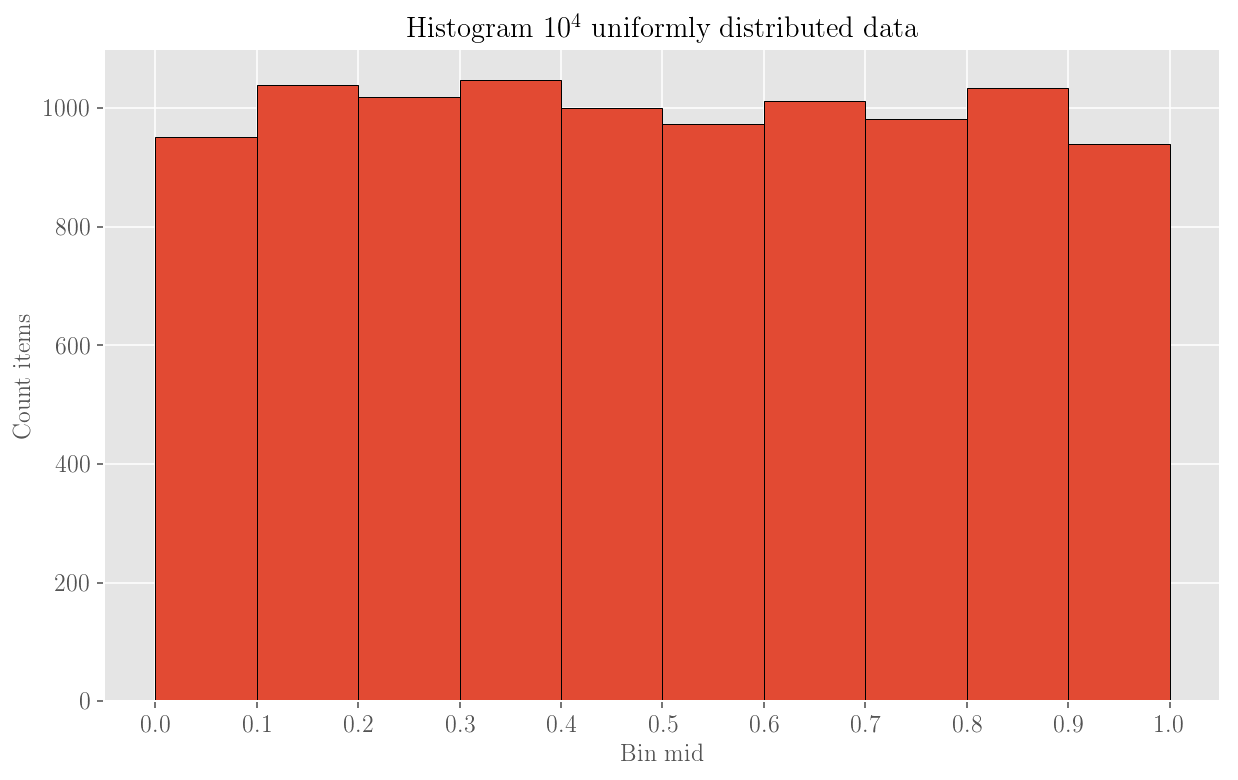

In [3]:
bins = np.arange(0, 1.1, 0.1)
bin_mids = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]                # the mid points of each bin

# Count the number of items falling in each bin
bin_counts = []
for i in range(len(bins) - 1):
    bin_counts.append(len(list(filter(lambda x: x >= bins[i] and x < bins[i+1], data))))
    
plt.bar(bin_mids, bin_counts, width=0.1, edgecolor='k')
plt.xticks(bins)
plt.title('Histogram $10^4$ uniformly distributed data')
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.show();

Note that the difference between the highest and the lowest values of the count is roughly 90. Let's say it's 100 so we're left with saying it is $1/100$ of the data. This histogram is doing a good job in showing us the data is uniformly distributed.

Now let's consider a gaussian distribution instead, taking $10^5$ numbers and plotting the bins counts again (this time). We take such numbers as centered around 0 and with a standard deviation of 1 and we plot their histogram with 20 bins. Also, let's not use bars this time:

In [4]:
data = np.random.normal(size=100000)

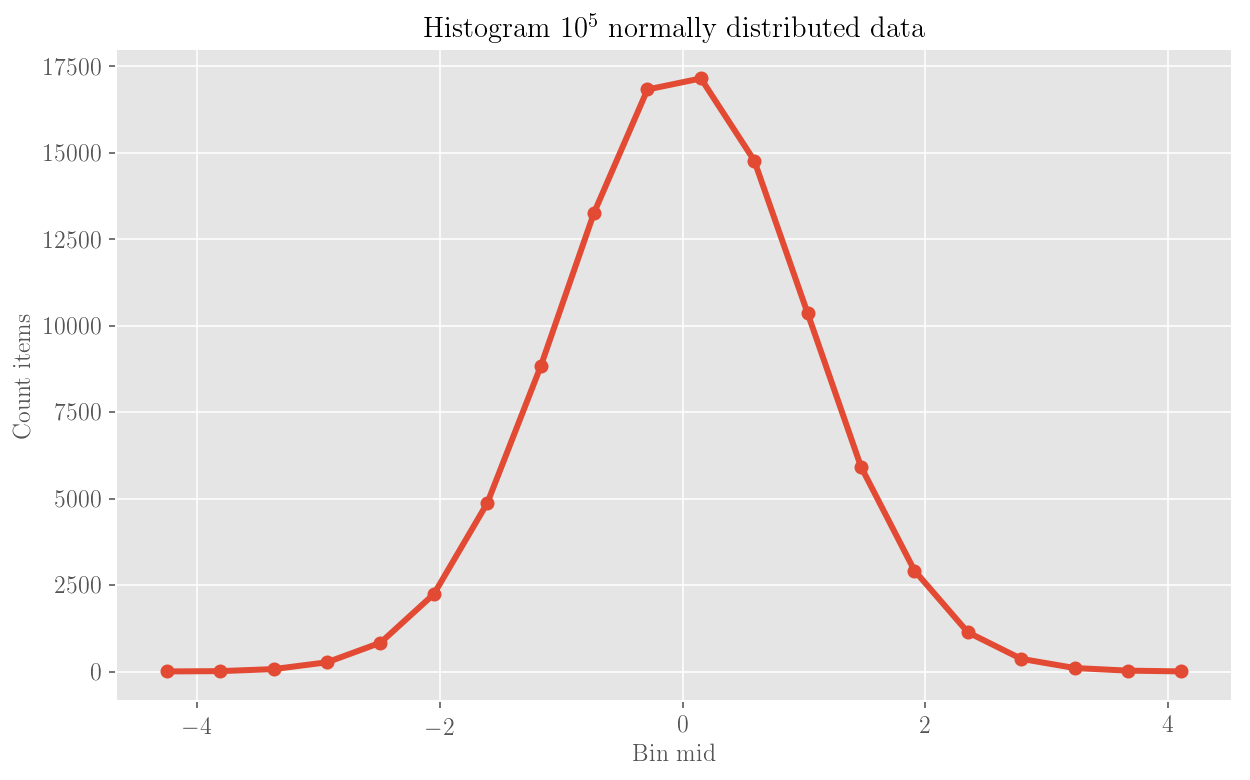

In [5]:
bins = 20
hist = np.histogram(data, bins=bins)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]

plt.plot(bin_mids, hist_vals, marker='o')
plt.title('Histogram $10^5$ normally distributed data')
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.show();

So, it is quite clear from the plot that the mean is indeed at 0. We can also do the same histogram but showing the *probability density*, that is, $p$ such that

$$
\sum_i^{n_b} p_i \delta_i = 1
$$

where $n_b$ is the number of bins and $\delta_i$ is the bin width of bin labelled $i$ (in our case here all bin widths are equal but we might have situations where they are not and depend on which data point we're at). In the continuous case, which clearly isn't that of a histogram, we would have

$$
\int_\Omega p(x) \text{d} x = 1
$$

on the space $\Omega$ of possible values of the variable.

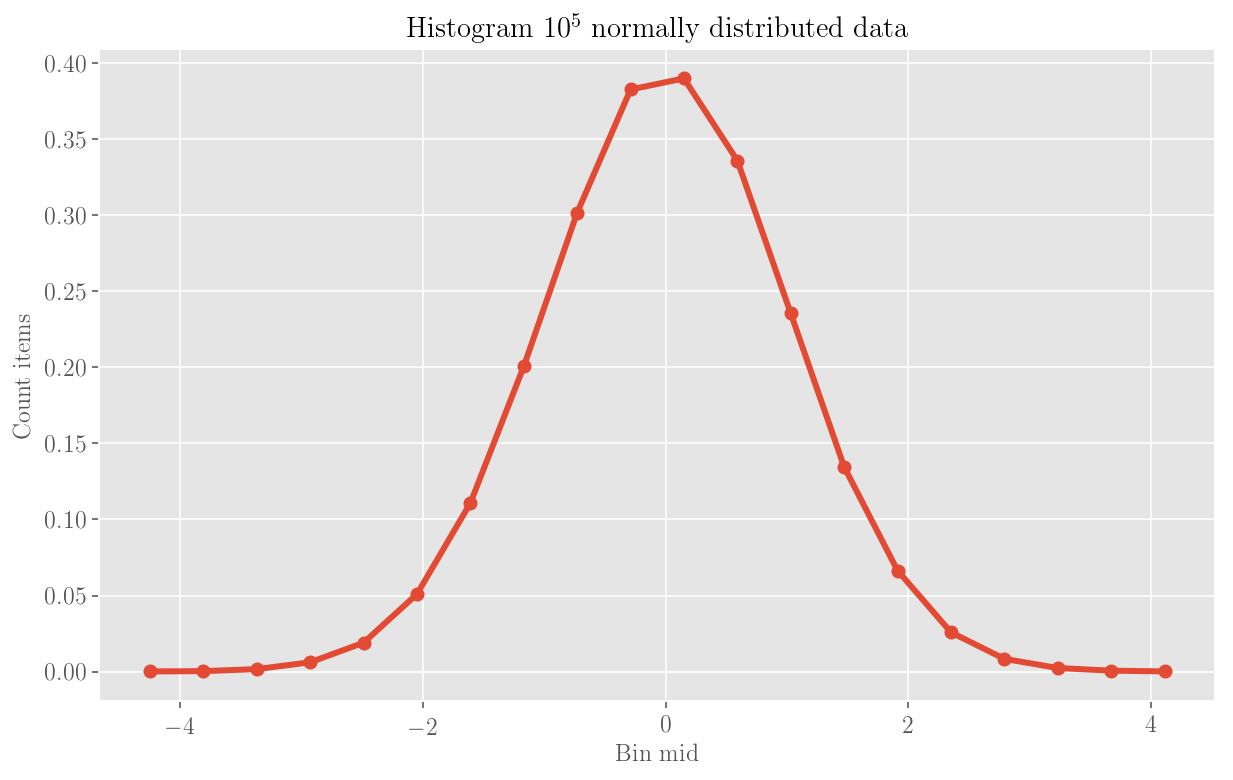

In [6]:
bins = 20
hist = np.histogram(data, bins=bins, density=True)
hist_vals, bin_edges = hist[0], hist[1]
bin_mids = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges) -1)]

plt.plot(bin_mids, hist_vals, marker='o')
plt.title('Histogram $10^5$ normally distributed data')
plt.xlabel('Bin mid')
plt.ylabel('Count items')
plt.show();

In [7]:
sum(hist_vals)

2.2738539615212163

In [8]:
bins

20

In [15]:
sum([(bin_edges[i+1] - bin_edges[i])*hist_vals[i] for i in range(len(hist_vals))])
sum([(bin_edges[1] - bin_edges[0])*hist_vals[i] for i in range(len(hist_vals))])

1.0

1.0000000000000007

In [12]:
hist_vals[0]

6.8215618845636448e-05